**Transformation lead-lag* , Mars 2024**

In [3]:
#!pip install yfinance

In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

symbol = '^GSPC'
data = yf.download(symbol, start='2020-03-02',end='2020-04-30')
data=data['Adj Close']

plt.figure(figsize=(14, 7))
plt.plot(data, label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Cours de clôture')
plt.legend()
#plt.show()

data_torch=torch.tensor(data.to_numpy())

In [390]:
import torch
import matplotlib.pyplot as plt

# Paramètres modèle B&S
torch.manual_seed(2024)

S0 = 100  ;mu = 0.05  ;sigma = 0.2  ;T = 1.0  

#T=len(data_torch)
dt = 1/252  # jours de trading

N = int(T / dt)  
#S_t=data_torch
times = torch.linspace(0, T, N)
W_t = torch.cumsum(torch.randn(N)*torch.sqrt(torch.tensor(dt)), dim=0)  
S_t = S0 * torch.exp((mu - 0.5 * sigma ** 2) * times + sigma * W_t)


def compute_lead_lag_transform(path: torch.Tensor) -> torch.Tensor:
    
    path_LL = torch.empty((len(path)-1, 2))
    
    for i in range(len(path)-1):
        if i % 2 == 0:  # Si l'indice est pair
            path_LL[i] = torch.tensor([path[i], path[i+1]])
        else:  # Si l'indice est impair
            path_LL[i] = torch.tensor([path[i+1], path[i]])
    
    return path_LL



lead_lag_path = compute_lead_lag_transform(S_t)
times_LL = torch.linspace(0, T, lead_lag_path.shape[0])


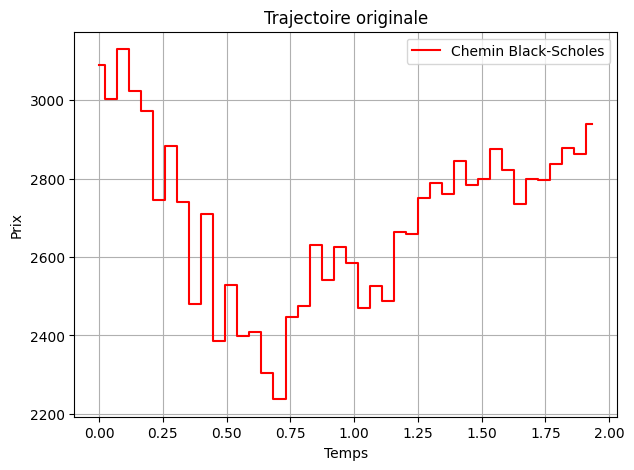

In [512]:
plt.figure(figsize=(7, 5))
plt.grid(True)
plt.step(times.numpy(), S_t.numpy(), label="Chemin Black-Scholes", color='red', where='mid')

plt.title('Trajectoire originale')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Prix')
chemin_complet = './img/illustration_lead_lag_BS.pdf'
plt.savefig(chemin_complet, format='pdf')

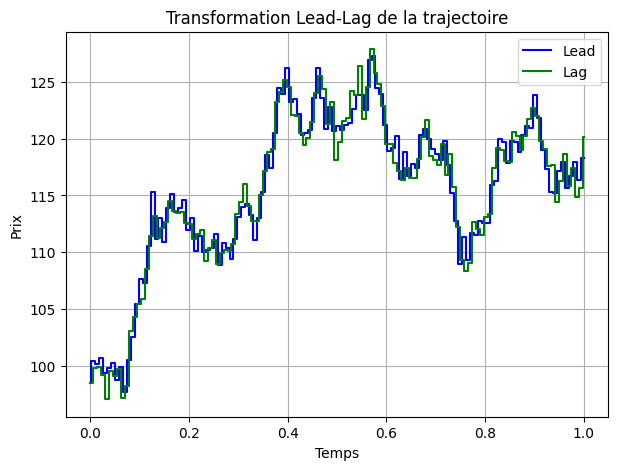

In [511]:

plt.figure(figsize=(7, 5))
plt.step(times_LL.numpy(), lead_lag_path[:, 0].numpy(), label="Lead", color='blue', where='mid')
plt.step(times_LL.numpy(), lead_lag_path[:, 1].numpy(), label="Lag", color='green', where='mid')

plt.title('Transformation Lead-Lag de la trajectoire')
plt.xlabel('Temps')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)


chemin_complet = './img/illustration_lead_lag.pdf'
plt.savefig(chemin_complet, format='pdf')

plt.show()



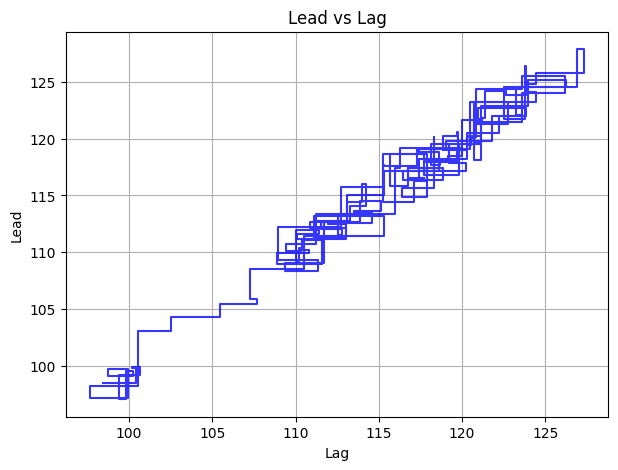

In [510]:
lead = lead_lag_path[:, 0]
lag = lead_lag_path[:, 1]

plt.figure(figsize=(7, 5))
plt.plot(lead, lag, linestyle='-', alpha=0.79,color='blue')
plt.title('Lead vs Lag')
plt.xlabel('Lag')
plt.ylabel('Lead')
plt.grid(True)
chemin_complet = './img/lead_vs_lag.pdf'
plt.savefig(chemin_complet, format='pdf')


plt.show()

**Transformation Lead-lag Hoff**

In [487]:
import yfinance as yf
import matplotlib.pyplot as plt

symbol = '^GSPC'
data = yf.download(symbol, start='2020-03-02',end='2020-04-30')
data=data['Adj Close']
data_torch=torch.tensor(data.to_numpy())

T = (data.index[-1] - data.index[0]).days/30  # Durée en années
N = len(data)
times = torch.linspace(0, T, N)
S_t=data_torch

[*********************100%%**********************]  1 of 1 completed


In [488]:
def compute_lead_lag_transform_Hoff(times: torch.Tensor, S_t: torch.Tensor):
    N = len(times) // 2
    X_lead = torch.zeros_like(S_t)
    X_lag = torch.zeros_like(S_t)
       
    for t in range(2 * N):
        k = t // 2  # indice de la paire (k, k+1)

        # Calcul de X_lead
        
        if t % 2 == 0:  # t est pair, donc t ∈ [2k, 2k+1]
            
            X_lead[t] = S_t[k + 1]
        else:  # t est impair
            if t <= 2 * k + 1:
                X_lead[t] = S_t[k + 1] + 2 * (times[t] - times[2 * k + 1]) * (S_t[k + 2] - S_t[k + 1])
            else:
                X_lead[t] = S_t[k + 2]

        # Calcul de X_lag
        
        if t < 2 * k + 1.5:
            X_lag[t] = S_t[k]
        else:
            X_lag[t] = S_t[k + 1] + 2 * (times[t] - times[2 * k + 1.5]) * (S_t[k + 1] - S_t[k])

    return X_lead[:-1], X_lag[:-1]  #2N points

X_lead, X_lag = compute_lead_lag_transform_Hoff(times, S_t)

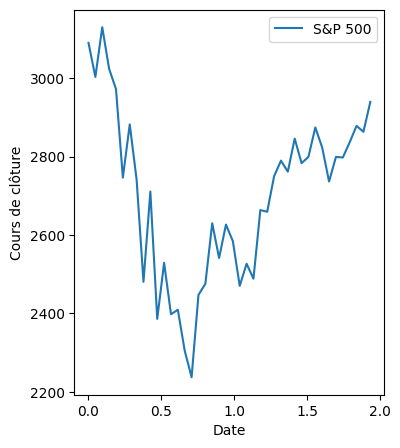

In [494]:
plt.figure(figsize=(4, 5))
plt.plot(times,data, label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Cours de clôture')
plt.legend()

chemin_complet = './img/img_S&P500.pdf'
plt.savefig(chemin_complet, format='pdf')

plt.show()

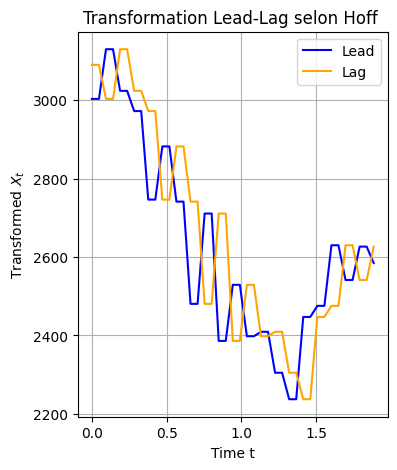

In [508]:
plt.figure(figsize=(4, 5))

plt.plot(times.numpy()[:-1], X_lead.numpy(), label='Lead', color='blue')
plt.plot(times.numpy()[:-1], X_lag.numpy(), label='Lag', color='orange')
plt.xlabel('Time t')
plt.ylabel('Transformed $X_{t}$')
plt.title('Transformation Lead-Lag selon Hoff ')
plt.legend()
plt.grid(True)

chemin_complet = './img/illustration_lead_lag_Hoff.pdf'
plt.savefig(chemin_complet, format='pdf')

plt.show()

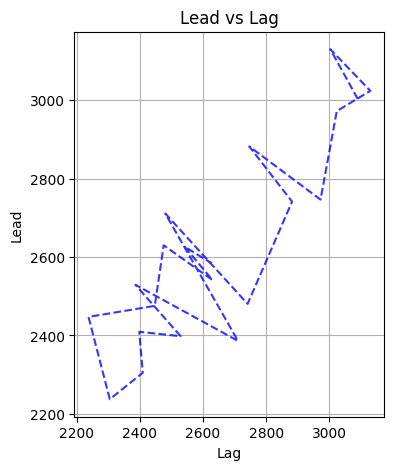

In [503]:
plt.figure(figsize=(4, 5))
plt.plot(X_lag, X_lead, linestyle='--', alpha=0.79,color='blue')
plt.title('Lead vs Lag')
plt.xlabel('Lag')
plt.ylabel('Lead')
plt.grid(True)

chemin_complet = './img/lead_vs_lag_Hoff.pdf'
plt.savefig(chemin_complet, format='pdf')

plt.show()

**Signature comme outil de feature engineering**

In [31]:
pip install iisignature

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 2.0 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.4 MB 2.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 2.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 2.8 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 3.0 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 3.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.4 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
# sig_learn.py
import numpy as np
#from signatory import *
from iisignature import *
from sklearn import linear_model
import numbers

In [3]:
# sig_learn.py

class SigLearn:
    def __init__(self, order=2, alpha=0.1):
        if not isinstance(order, numbers.Integral) or order<1:
            raise NameError('The order must be a'
                            'positive integer.')
        if not isinstance(alpha, numbers.Real) or alpha<=0.0:
            raise NameError('Alpha must be a positive real.')
        self.order=int(order)
        self.reg=None
        self.alpha=alpha

In [11]:
import numpy as np
from iisignature import *
from sklearn import linear_model
import numbers


class SigLearn:

    def __init__(self, order=2, alpha=0.1):
        if not isinstance(order, numbers.Integral) or order < 1:
            raise NameError('The order must be a positive integer.')
        if not isinstance(alpha, numbers.Real) or alpha <= 0.0:
            raise NameError('Alpha must be a positive real.')
        
        self.order = int(order)
        self.reg = None
        self.alpha = alpha
        
    def train(self, x, y):
        """
        Trains the model using signatures.
        
        x: list of inputs, where each element of
           the list is a list of tuples.
        y: list of outputs.
        """
        # We check that x and y have appropriate types
        if x is None or y is None:
            return
        if not (isinstance(x, (list, tuple)) or not isinstance(y, (list, tuple))):
            raise NameError('Input and output must be lists or tuples.')
        if len(x) != len(y):
            raise NameError('The number of inputs and the number of outputs must coincide.')
        
        X = [list(sig(np.array(stream), self.order)) for stream in x]
        self.reg = linear_model.Lasso(alpha=self.alpha)
        self.reg.fit(X, y)
        
    def predict(self, x):
        """
        Predicts the outputs of the inputs x using the pre-trained model.
        
        x: list of inputs, where each element of
           the list is a list of tuples.

        Returns:
        list of predicted outputs.
        """
        if self.reg is None:
            raise NameError('The model is not trained.')

        X = [list(sig(np.array(stream), self.order)) for stream in x]
        return self.reg.predict(X)


In [19]:
import numpy as np

# Generate data
def generate_data(num_sequences=100, sequence_length=10, num_features=2):
    X = []
    Y = []
    
    coefficients = np.random.rand(num_features)
    
    for _ in range(num_sequences):
        sequence = np.random.rand(sequence_length, num_features)
        X.append([(tuple(point)) for point in sequence])
        
        y_value = np.mean(np.dot(sequence, coefficients)) + np.random.normal(0, 0.1)
        Y.append(y_value)
    
    return X, Y

# Generate the data
X, Y = generate_data()



In [20]:
model = SigLearn(order=10, alpha=0.1)
model.train(X, Y)

# Faisons des prédictions
predictions = model.predict(X)

# Affichons les premières prédictions
predictions[:5]

array([0.28695138, 0.28695138, 0.28695138, 0.28695138, 0.28695138])

: 

In [3]:
pip install scikit-learn

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 3.8 MB/s eta 0:00:03
   ---------------------------------------- 0.1/9.3 MB 3.8 MB/s eta 0:00:03
    --------------------------------------- 0.2/9.3 MB 1.8 MB/s eta 0:00:06
    --------------------------------------- 0.2/9.3 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.3 MB 1.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.3 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.7/9.3 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.7/9.3 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.3 MB 1.8 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.3 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.3 MB 1.5 MB/s eta 0:00:06
   --- -------------------------